<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Wine DataSet</font></h1>

## Introduction
In this Notebook we will analyse the Wine Dateset from UCI Machine Learning Repository.  
We will build a Regression Model, Using chemical analysis determine the origin of wines
Go through [Readme.md](./Readme.md) for more details

### Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3 color="black">

1. <a href="#item1">DataSet</a>

2. <a href="#item2">Relationship Visualization</a>    

3. <a href="#item3">Preprocessing</a>

4. <a href="#item3">Model</a>
</font>
</div>

### Note : Run below Only in Colab

Uninstall and reinstall Pandas Profiling for compatibiliy 

In [1]:
! pip uninstall pandas-profiling
! pip install pandas-profiling[notebook,html]

from google.colab import files
files.upload()

Uninstalling pandas-profiling-2.10.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-2.10.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-2.10.0
  Using cached https://files.pythonhosted.org/packages/3d/8e/645ad7f304dd8d6d7181d22d4bd3d6356331c80c2944a25be3ebe617ec38/pandas_profiling-2.10.0-py2.py3-none-any.whl


Saving wine.csv to wine (1).csv


{'wine.csv': b'Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline\n1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480\n1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295\n1,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045\n1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045\n1,14.1,2.16,2.3,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.0,1.17,2.82,1280\n1,13.75,1.73,2.

In [76]:
# Import all required Libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## to make this notebook's output stable across runs
np.random.seed(2210)

In [3]:
pd.__version__, np.__version__

('1.1.5', '1.19.5')

# Data Exploration
Let's load the Dataset and analyze

In [33]:
df = pd.read_csv('wine.csv')
df.columns = df.columns.map(lambda x : x.lower().replace(' ','_')).to_list()
df['od'] = df['od280/od315_of_diluted_wines']
df.drop('od280/od315_of_diluted_wines', axis=1, inplace=True)
df.head()

class  alcohol  malic_acid   ash  ...  color_intensity   hue  proline    od
0      1    14.23        1.71  2.43  ...             5.64  1.04     1065  3.92
1      1    13.20        1.78  2.14  ...             4.38  1.05     1050  3.40
2      1    13.16        2.36  2.67  ...             5.68  1.03     1185  3.17
3      1    14.37        1.95  2.50  ...             7.80  0.86     1480  3.45
4      1    13.24        2.59  2.87  ...             4.32  1.04      735  2.93

[5 rows x 14 columns]

In [5]:
# View the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  proline               178 non-null    int64  
 13  od                    178 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Generate Profile to view the details

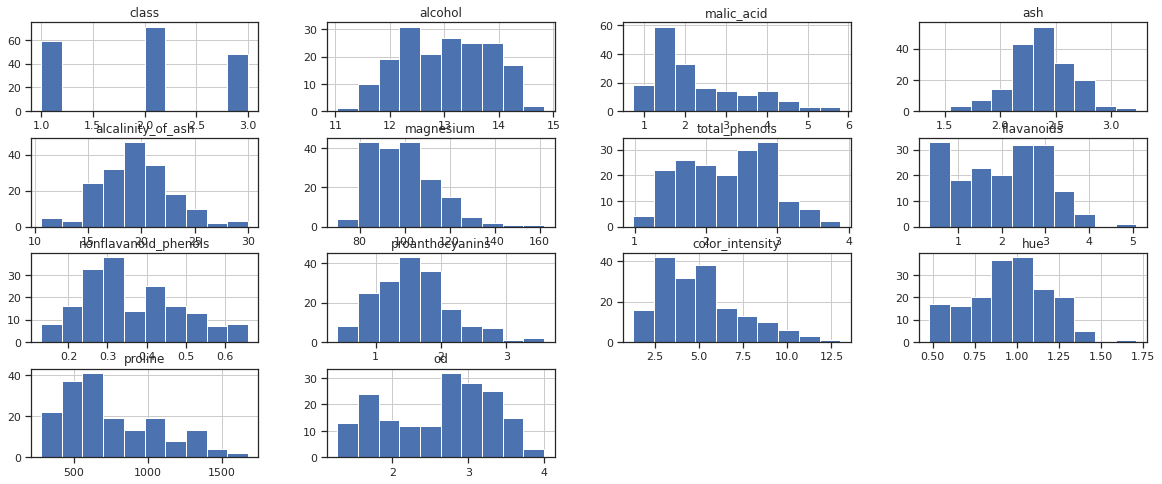

In [15]:
_ = df.hist(figsize=(20,8))

In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=df, title="Pandas Profiling")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=424545)
X_train.shape, X_test.shape

((142, 13), (36, 13))

## Feature Selection
View the Information Gain of each column against the class and view top features

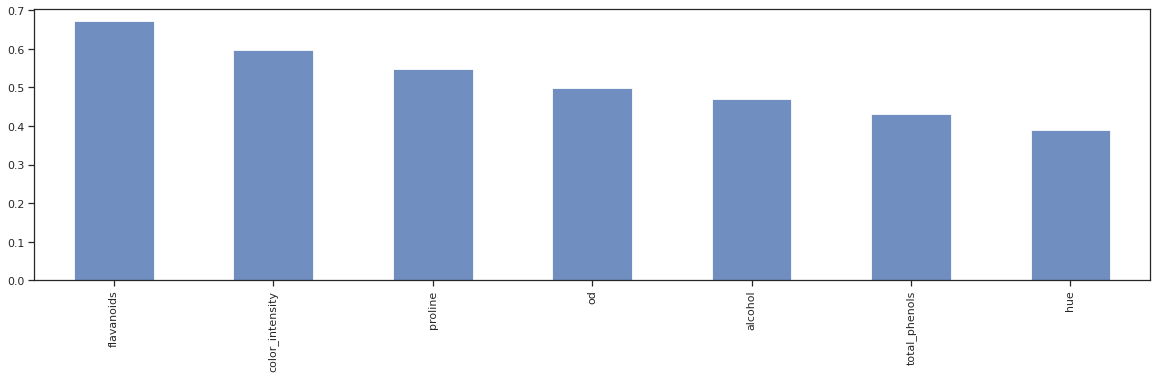

In [66]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = pd.Series(mutual_info_classif(X_train, y_train), index=X_train.columns)
_ = mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,5), alpha=0.8)

In [35]:
from sklearn.feature_selection import SelectKBest
best_cols = SelectKBest(mutual_info_classif, k=7).fit(X_train, y_train)
best_cols = X_train.columns[best_cols.get_support()].to_list()
best_cols

['alcohol',
 'total_phenols',
 'flavanoids',
 'color_intensity',
 'hue',
 'proline',
 'od']

# Preprocessing

Now that we have explored the data take only top seven columns for our Model

In [77]:
def preprocess_data(df, num_kbest_cols=7):
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1),
                                                      df['class'], test_size=0.2,
                                                      random_state=424545)
  # Find the best features by Information gain
  # from sklearn.feature_selection import mutual_info_classif
  # mutual_info = pd.Series(mutual_info_classif(X_train, y_train), index=X_train.columns)
  from sklearn.pipeline import Pipeline
  from sklearn.feature_selection import SelectKBest
  preprocess_pipeline = Pipeline(
      [('kbest', SelectKBest(mutual_info_classif, 7))]
      )
  X_train = preprocess_pipeline.fit_transform(X_train, y_train)
  X_test = preprocess_pipeline.fit_transform(X_test, y_test)
  print(f"Train data Shape {X_train.shape}, test data shape {X_test.shape}")
  return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = preprocess_data(df)

Train data Shape (142, 7), test data shape (36, 7)


# Model Selection
Let's try out different ML models and select the best one 

In [97]:
def tune_model(model, param_grid, cv=5, verbose=0):
  # Find the best parameters
  grid_search = GridSearchCV(model, param_grid, cv=5, verbose=0, n_jobs=-1)
  grid_search.fit(X_train, y_train)

  print(f"Performing Grid search for {type(model).__name__} ...")
  print(f"Best parameters : {grid_search.best_params_} with score {grid_search.best_score_:.2}")
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  cnf =  confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print(type(report))
  print(f"\n{cnf}\n{report}\n")
  print
  print(f"Accuracy of Model {type(model).__name__} : {accuracy:.2}")

####KNeighbors classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': range(3, 8)}]

tune_model(model, param_grid)

Performing Grid search for KNeighborsClassifier ...
Best parameters : {'n_neighbors': 3, 'weights': 'distance'} with score 0.72
<class 'str'>

[[13  1  0]
 [ 2  7  1]
 [ 3  4  5]]
              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.58      0.70      0.64        10
           3       0.83      0.42      0.56        12

    accuracy                           0.69        36
   macro avg       0.71      0.68      0.67        36
weighted avg       0.72      0.69      0.68        36


Accuracy of Model KNeighborsClassifier : 0.69


####DecisionTree classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param_grid = [{'splitter': ["best", "random"], 'criterion':['gini', 'entropy'], 'max_depth': range(2, 6)}]

tune_model(model, param_grid)

Performing Grid search for DecisionTreeClassifier ...
Best parameters : {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'} with score 0.94
<class 'str'>

[[14  0  0]
 [ 1  9  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.90      0.90      0.90        10
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36


Accuracy of Model DecisionTreeClassifier : 0.94


####RandomForest Ensemble

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = [{'bootstrap': [False, False], 'criterion':['gini', 'entropy'],
               'max_depth': range(2, 6), 'n_estimators': range(5, 10)
               }]

tune_model(model, param_grid)

Performing Grid search for RandomForestClassifier ...
Best parameters : {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 8} with score 0.99
<class 'str'>

[[14  0  0]
 [ 1  9  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Accuracy of Model RandomForestClassifier : 0.97


####AdaBoost Classifier

In [101]:
from sklearn.ensemble import AdaBoostClassifier
model = RandomForestClassifier()
param_grid = [{'max_depth': range(2, 6)}]

tune_model(model, param_grid)

Performing Grid search for RandomForestClassifier ...
Best parameters : {'max_depth': 4} with score 0.98
<class 'str'>

[[14  0  0]
 [ 1  9  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Accuracy of Model RandomForestClassifier : 0.97


### We have got best accurracy and Precision with Random Forest and AdaBoost